<a href="https://colab.research.google.com/github/Fabrizio-Duran/Video-Game-Library-Search-Engine/blob/main/Assignment_4_Fabrizio_Duran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4 - Sentiment Analysis



---



## I. Setting Libaries
- Import Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import random


!pip install sentence-transformers
from sentence_transformers import SentenceTransformer, util
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# %matplotlib inline

## II. Find a NEW dataset.
- Must be labeled (i.e., have a label or rating that can serve as a sentiment category).
- Contain a text column (the raw text you’ll analyze).
- Generate a dataset using Grok up to 300 games.

In [ ]:
data = [
    {"title": "The Sims", "year": 2000, "genre": "Life Simulation", "description": "Create and control virtual people, managing their daily lives, relationships, and careers in a suburban sandbox."},
    {"title": "Diablo II", "year": 2000, "genre": "Action RPG", "description": "Battle through dark fantasy realms to defeat Diablo, upgrading skills and looting gear in a hack-and-slash adventure."},
    {"title": "Final Fantasy IX", "year": 2000, "genre": "RPG", "description": "Join Zidane and a band of heroes to stop a world-threatening war in a steampunk fantasy realm."},
    {"title": "Tony Hawk's Pro Skater 2", "year": 2000, "genre": "Sports", "description": "Perform tricks and combos as a pro skater across iconic levels with a killer soundtrack."},
    {"title": "Deus Ex", "year": 2000, "genre": "Immersive Sim", "description": "As JC Denton, navigate a cyberpunk conspiracy with freedom to choose stealth, combat, or hacking."},
    {"title": "Baldur's Gate II: Shadows of Amn", "year": 2000, "genre": "RPG", "description": "Lead a party through the Forgotten Realms, facing epic quests and moral dilemmas in a D&D adventure."},
    {"title": "The Legend of Zelda: Majora's Mask", "year": 2000, "genre": "Action-Adventure", "description": "Link must save Termina from a falling moon in a time-looping adventure with masks granting unique abilities."},
    {"title": "Perfect Dark", "year": 2000, "genre": "FPS", "description": "Agent Joanna Dark uncovers alien conspiracies in a futuristic shooter with stealth and multiplayer modes."},
    {"title": "Jet Set Radio", "year": 2000, "genre": "Action", "description": "Skate through Tokyo-to, tagging graffiti and evading cops in a vibrant, cel-shaded world."},
    {"title": "SSX", "year": 2000, "genre": "Sports", "description": "Race and perform tricks on snowy slopes in this fast-paced snowboarding game with arcade flair."},
    {"title": "Resident Evil – Code: Veronica", "year": 2000, "genre": "Survival Horror", "description": "Claire Redfield battles zombies on a remote island, uncovering Umbrella’s sinister experiments."},
    {"title": "Vagrant Story", "year": 2000, "genre": "Action RPG", "description": "As Ashley Riot, explore dungeons and unravel a dark fantasy plot with tactical combat."},
    {"title": "Crazy Taxi", "year": 2000, "genre": "Racing", "description": "Drive a taxi at breakneck speeds, delivering passengers in a chaotic, open-world city."},
    {"title": "Shenmue", "year": 2000, "genre": "Action-Adventure", "description": "Ryo Hazuki seeks his father’s killer in a detailed open world with QTEs and daily routines."},
    {"title": "Skies of Arcadia", "year": 2000, "genre": "RPG", "description": "Sail the skies as a pirate, battling enemies and exploring floating islands in a vibrant JRPG."},
    {"title": "Chrono Cross", "year": 2000, "genre": "RPG", "description": "Serge navigates parallel worlds to uncover a cosmic mystery in this sequel to Chrono Trigger."},
    {"title": "NFL 2K1", "year": 2000, "genre": "Sports", "description": "Compete in realistic American football matches with innovative passing mechanics and online play."},
    {"title": "Spyro: Year of the Dragon", "year": 2000, "genre": "Platformer", "description": "Spyro rescues dragon eggs from an evil sorceress across colorful 3D worlds."},
    {"title": "Dragon Quest VII", "year": 2000, "genre": "RPG", "description": "Travel through time to restore lost continents in a classic turn-based JRPG."},
    {"title": "Hitman: Codename 47", "year": 2000, "genre": "Stealth", "description": "As Agent 47, assassinate targets using disguises and creative tactics in a gritty crime world."},
    {"title": "Halo: Combat Evolved", "year": 2001, "genre": "FPS", "description": "As Master Chief, fight alien Covenant forces on a ringworld in a groundbreaking sci-fi shooter."},
    {"title": "Grand Theft Auto III", "year": 2001, "genre": "Open World", "description": "Claude rises through Liberty City’s criminal underworld in a revolutionary 3D sandbox."},
    {"title": "Final Fantasy X", "year": 2001, "genre": "RPG", "description": "Tidus and Yuna embark on a pilgrimage to defeat Sin in a visually stunning JRPG."},
    {"title": "Metal Gear Solid 2: Sons of Liberty", "year": 2001, "genre": "Stealth", "description": "Snake and Raiden infiltrate a terrorist threat, blending stealth with a complex narrative."},
    {"title": "Super Smash Bros. Melee", "year": 2001, "genre": "Fighting", "description": "Nintendo characters battle in fast-paced multiplayer arenas with precise mechanics."},
    {"title": "Animal Crossing", "year": 2001, "genre": "Life Simulation", "description": "Live in a cozy village, fishing, decorating, and bonding with quirky animal neighbors."},
    {"title": "Devil May Cry", "year": 2001, "genre": "Action", "description": "Dante hunts demons with stylish sword-and-gun combat in a gothic action game."},
    {"title": "Silent Hill 2", "year": 2001, "genre": "Survival Horror", "description": "James Sunderland explores a foggy town, confronting psychological horrors and personal trauma."},
    {"title": "Luigi’s Mansion", "year": 2001, "genre": "Action-Adventure", "description": "Luigi vacuums ghosts in a haunted mansion to rescue Mario in this quirky adventure."},
    {"title": "Jak and Daxter: The Precursor Legacy", "year": 2001, "genre": "Platformer", "description": "Jak and Daxter collect power cells to stop an evil plot in a vibrant 3D world."},
    {"title": "Red Faction", "year": 2001, "genre": "FPS", "description": "Fight as a miner rebelling against a Martian corporation with destructible environments."},
    {"title": "Pikmin", "year": 2001, "genre": "Strategy", "description": "Captain Olimar commands colorful Pikmin to recover ship parts on a strange planet."},
    {"title": "Max Payne", "year": 2001, "genre": "Third-Person Shooter", "description": "A noir-inspired cop uses bullet-time to battle criminals after a personal tragedy."},
    {"title": "Ico", "year": 2001, "genre": "Action-Adventure", "description": "A boy and a princess escape a cursed castle in a minimalist, emotional puzzle adventure."},
    {"title": "Advance Wars", "year": 2001, "genre": "Turn-Based Strategy", "description": "Command armies in tactical battles with colorful units and strategic depth."},
    {"title": "Burnout", "year": 2001, "genre": "Racing", "description": "Race at high speeds, crashing rivals in an adrenaline-pumping arcade racer."},
    {"title": "Golden Sun", "year": 2001, "genre": "RPG", "description": "Young heroes wield elemental magic to save their world in a classic handheld JRPG."},
    {"title": "Gran Turismo 3: A-Spec", "year": 2001, "genre": "Racing", "description": "Race realistic cars on detailed tracks in a premier racing simulator."},
    {"title": "Twisted Metal: Black", "year": 2001, "genre": "Vehicular Combat", "description": "Battle in armed vehicles in a dark, chaotic tournament with twisted characters."},
    {"title": "Phantasy Star Online", "year": 2001, "genre": "MMORPG", "description": "Team up to explore alien planets, battling monsters in a pioneering online RPG."},
    {"title": "Resident Evil 4", "year": 2005, "genre": "Survival Horror", "description": "Leon Kennedy rescues the president’s daughter from a cult in a revolutionary action-horror game."},
    {"title": "Grand Theft Auto: San Andreas", "year": 2004, "genre": "Open World", "description": "CJ navigates 1990s gang life across a massive state in a landmark sandbox game."},
    {"title": "Half-Life 2", "year": 2004, "genre": "FPS", "description": "Gordon Freeman battles alien oppressors in a physics-driven sci-fi shooter masterpiece."},
    {"title": "World of Warcraft", "year": 2004, "genre": "MMORPG", "description": "Explore Azeroth, questing and raiding in the definitive massively multiplayer RPG."},
    {"title": "Shadow of the Colossus", "year": 2005, "genre": "Action-Adventure", "description": "Slay massive colossi in a haunting, minimalist world to save a loved one."},
    {"title": "God of War", "year": 2005, "genre": "Action", "description": "Kratos seeks vengeance against Ares in a brutal, mythological hack-and-slash epic."},
    {"title": "Battlefield 2", "year": 2005, "genre": "FPS", "description": "Engage in large-scale modern warfare with vehicles and team-based multiplayer."},
    {"title": "Ninja Gaiden", "year": 2004, "genre": "Action", "description": "Ryu Hayabusa battles ninjas and demons in a challenging, fast-paced action game."},
    {"title": "Katamari Damacy", "year": 2004, "genre": "Puzzle", "description": "Roll objects into a growing ball to rebuild stars in a quirky, colorful adventure."},
    {"title": "Metroid Prime", "year": 2002, "genre": "Action-Adventure", "description": "Samus explores a 3D alien world, solving puzzles and battling foes in a first-person adventure."},
    {"title": "The Elder Scrolls III: Morrowind", "year": 2002, "genre": "RPG", "description": "Explore a vast fantasy world with unmatched freedom in an open-ended RPG."},
    {"title": "Warcraft III: Reign of Chaos", "year": 2002, "genre": "RTS", "description": "Command armies in a fantasy war, blending strategy and hero-based gameplay."},
    {"title": "Splinter Cell", "year": 2002, "genre": "Stealth", "description": "Sam Fisher infiltrates enemy bases using stealth and gadgets in a tense spy thriller."},
    {"title": "Kingdom Hearts", "year": 2002, "genre": "Action RPG", "description": "Sora teams with Disney characters to battle Heartless in a magical crossover RPG."},
    {"title": "Super Mario Sunshine", "year": 2002, "genre": "Platformer", "description": "Mario cleans Isle Delfino with FLUDD, a water-spraying backpack, in a sunny 3D adventure."},
    {"title": "Ratchet & Clank", "year": 2002, "genre": "Platformer", "description": "Ratchet and Clank battle an evil chairman with quirky weapons in a sci-fi platformer."},
    {"title": "Medal of Honor: Allied Assault", "year": 2002, "genre": "FPS", "description": "Fight in WWII battles, from D-Day to secret missions, in a cinematic shooter."},
    {"title": "Fire Emblem", "year": 2003, "genre": "Tactical RPG", "description": "Lead a band of warriors in turn-based battles with deep strategy and permadeath."},
    {"title": "F-Zero GX", "year": 2003, "genre": "Racing", "description": "Race futuristic hovercraft at blistering speeds in a challenging sci-fi racer."},
    {"title": "Star Wars: Knights of the Old Republic", "year": 2003, "genre": "RPG", "description": "Shape your Jedi’s destiny in a Star Wars saga with moral choices and epic battles."},
    {"title": "Beyond Good & Evil", "year": 2003, "genre": "Action-Adventure", "description": "Jade investigates a conspiracy with photography and stealth in a vibrant sci-fi world."},
    {"title": "Call of Duty", "year": 2003, "genre": "FPS", "description": "Experience WWII combat through intense, cinematic campaigns across multiple fronts."},
    {"title": "Prince of Persia: The Sands of Time", "year": 2003, "genre": "Action-Adventure", "description": "Rewind time to navigate traps and fight enemies in a Persian palace."},
    {"title": "Mario Kart: Double Dash!!", "year": 2003, "genre": "Racing", "description": "Race with dual-character karts, swapping items in frantic multiplayer battles."},
    {"title": "Need for Speed: Underground", "year": 2003, "genre": "Racing", "description": "Customize cars and race through neon-lit streets in a street-racing classic."},
    {"title": "The Legend of Zelda: The Wind Waker", "year": 2003, "genre": "Action-Adventure", "description": "Link sails a vast ocean to save his sister in a cel-shaded Zelda epic."},
    {"title": "Viewtiful Joe", "year": 2003, "genre": "Beat 'em Up", "description": "Joe uses movie-inspired powers to fight in a stylish, side-scrolling brawler."},
    {"title": "Soulcalibur II", "year": 2003, "genre": "Fighting", "description": "Wield weapons in fast-paced 3D battles with a roster of iconic fighters."},
    {"title": "Midnight Club II", "year": 2003, "genre": "Racing", "description": "Race through open-world cities, evading cops in high-stakes street races."},
    {"title": "Guitar Hero", "year": 2005, "genre": "Rhythm", "description": "Rock out with a plastic guitar, hitting notes to classic songs in a cultural phenomenon."},
    {"title": "Forza Motorsport", "year": 2005, "genre": "Racing", "description": "Race and tune realistic cars in a detailed simulator with deep customization."},
    {"title": "F.E.A.R.", "year": 2005, "genre": "FPS", "description": "Battle paranormal threats as a special forces operative in a creepy, intense shooter."},
    {"title": "Psychonauts", "year": 2005, "genre": "Platformer", "description": "Raz explores minds with psychic powers in a quirky, imaginative 3D platformer."},
    {"title": "Nintendogs", "year": 2005, "genre": "Simulation", "description": "Raise and train virtual puppies using the DS touchscreen in a charming pet sim."},
    {"title": "Burnout 3: Takedown", "year": 2004, "genre": "Racing", "description": "Crash rivals and race aggressively in a high-octane arcade racer with spectacular collisions."},
    {"title": "Doom 3", "year": 2004, "genre": "FPS", "description": "Fight demons on a Mars base in a dark, horror-infused first-person shooter."},
    {"title": "Far Cry", "year": 2004, "genre": "FPS", "description": "Explore a tropical island, battling mercenaries in an open-ended shooter with stunning visuals."},
    {"title": "The Sims 2", "year": 2004, "genre": "Life Simulation", "description": "Manage Sims’ lives through generations, with expanded customization and 3D graphics."},
    {"title": "Paper Mario: The Thousand-Year Door", "year": 2004, "genre": "RPG", "description": "Mario embarks on a comedic RPG adventure to collect Crystal Stars."},
    {"title": "Pikmin 2", "year": 2004, "genre": "Strategy", "description": "Olimar commands Pikmin to explore dungeons and recover treasures in a strategic sequel."},
    {"title": "Def Jam: Fight for NY", "year": 2004, "genre": "Fighting", "description": "Brawl as hip-hop stars in gritty street fights with a deep customization system."},
    {"title": "Rome: Total War", "year": 2004, "genre": "Strategy", "description": "Lead Roman factions in real-time battles and turn-based empire management."},
    {"title": "Gears of War", "year": 2006, "genre": "Third-Person Shooter", "description": "Marcus Fenix battles Locust hordes in a gritty, cover-based shooter with co-op."},
    {"title": "Wii Sports", "year": 2006, "genre": "Sports", "description": "Play tennis, bowling, and more with motion controls in a family-friendly Wii classic."},
    {"title": "The Elder Scrolls IV: Oblivion", "year": 2006, "genre": "RPG", "description": "Explore Cyrodiil, closing demonic gates in a sprawling open-world RPG."},
    {"title": "Okami", "year": 2006, "genre": "Action-Adventure", "description": "As wolf-god Amaterasu, restore a vibrant world using celestial brush techniques."},
    {"title": "Final Fantasy XII", "year": 2006, "genre": "RPG", "description": "Vaan and allies fight for freedom in Ivalice with an innovative gambit combat system."},
    {"title": "Dead Rising", "year": 2006, "genre": "Action", "description": "Frank West battles zombies in a mall, using improvised weapons in a chaotic sandbox."},
    {"title": "Bully", "year": 2006, "genre": "Open World", "description": "Navigate boarding school life as a mischievous teen in a Rockstar open-world adventure."},
    {"title": "Company of Heroes", "year": 2006, "genre": "RTS", "description": "Command WWII troops in intense real-time battles with destructible environments."},
    {"title": "Viva Piñata", "year": 2006, "genre": "Simulation", "description": "Build a garden to attract and breed colorful piñata creatures in a charming sim."},
    {"title": "Rock Band", "year": 2007, "genre": "Rhythm", "description": "Form a band with guitar, drums, and vocals to play iconic songs in a party game."},
    {"title": "BioShock", "year": 2007, "genre": "FPS", "description": "Explore Rapture, an underwater dystopia, using plasmids and weapons in a narrative-driven shooter."},
    {"title": "Portal", "year": 2007, "genre": "Puzzle", "description": "Solve puzzles with a portal gun in a witty, sci-fi test facility run by GLaDOS."},
    {"title": "Call of Duty 4: Modern Warfare", "year": 2007, "genre": "FPS", "description": "Fight in modern warfare campaigns with intense multiplayer and a gripping story."},
    {"title": "Super Mario Galaxy", "year": 2007, "genre": "Platformer", "description": "Mario explores space, jumping across planets in a groundbreaking 3D platformer."},
    {"title": "Mass Effect", "year": 2007, "genre": "RPG", "description": "Commander Shepard saves the galaxy in a choice-driven sci-fi RPG with deep lore."},
    {"title": "Assassin’s Creed", "year": 2007, "genre": "Action-Adventure", "description": "As Altaïr, perform stealthy assassinations in a historical open world during the Crusades."},
    {"title": "Uncharted: Drake’s Fortune", "year": 2007, "genre": "Action-Adventure", "description": "Nathan Drake hunts treasure in a cinematic adventure with platforming and shooting."},
    {"title": "Team Fortress 2", "year": 2007, "genre": "FPS", "description": "Join colorful classes in fast-paced, team-based multiplayer with cartoonish charm."},
    {"title": "The Witcher", "year": 2007, "genre": "RPG", "description": "Geralt of Rivia hunts monsters in a morally complex fantasy world based on the novels."},
    {"title": "Street Fighter IV", "year": 2008, "genre": "Fighting", "description": "Battle with iconic fighters in a visually stunning 2.5D revival of the classic series."},
    {"title": "Grand Theft Auto IV", "year": 2008, "genre": "Open World", "description": "Niko Bellic navigates Liberty City’s underworld in a gritty, story-driven sandbox."},
    {"title": "Fallout 3", "year": 2008, "genre": "RPG", "description": "Explore a post-apocalyptic wasteland, making choices that shape your survivor’s journey."},
    {"title": "Left 4 Dead", "year": 2008, "genre": "FPS", "description": "Team up to survive zombie hordes in intense, cooperative first-person shooter campaigns."},
    {"title": "Dead Space", "year": 2008, "genre": "Survival Horror", "description": "Isaac Clarke battles grotesque necromorphs aboard a derelict spaceship."},
    {"title": "Mirror’s Edge", "year": 2008, "genre": "Action", "description": "Run, jump, and fight as Faith in a first-person parkour adventure in a dystopian city."},
    {"title": "LittleBigPlanet", "year": 2008, "genre": "Platformer", "description": "Create and share levels with Sackboy in a charming, cooperative platformer."},
    {"title": "Braid", "year": 2008, "genre": "Puzzle Platformer", "description": "Manipulate time to solve puzzles in an indie platformer with a poetic narrative."},
    {"title": "Spore", "year": 2008, "genre": "Simulation", "description": "Evolve creatures from cells to civilizations in a unique, multi-stage sim."},
    {"title": "Burnout Paradise", "year": 2008, "genre": "Racing", "description": "Race and crash in an open-world city with seamless multiplayer events."},
    {"title": "Batman: Arkham Asylum", "year": 2009, "genre": "Action-Adventure", "description": "Batman battles villains in Arkham, using stealth and gadgets in a gripping adventure."},
    {"title": "Uncharted 2: Among Thieves", "year": 2009, "genre": "Action-Adventure", "description": "Nathan Drake chases a lost artifact in a cinematic sequel with thrilling set pieces."},
    {"title": "Dragon Age: Origins", "year": 2009, "genre": "RPG", "description": "Lead a party to stop a demonic blight in a deep, choice-driven fantasy RPG."},
    {"title": "Borderlands", "year": 2009, "genre": "FPS RPG", "description": "Loot and shoot as a vault hunter in a co-op, cel-shaded sci-fi adventure."},
    {"title": "Demon’s Souls", "year": 2009, "genre": "Action RPG", "description": "Battle brutal foes in a dark fantasy world with unforgiving difficulty."},
    {"title": "Bayonetta", "year": 2009, "genre": "Action", "description": "Witch Bayonetta fights angels with stylish, over-the-top combat and magic."},
    {"title": "Plants vs. Zombies", "year": 2009, "genre": "Tower Defense", "description": "Defend your house from zombies using quirky plants in a strategic casual game."},
    {"title": "League of Legends", "year": 2009, "genre": "MOBA", "description": "Compete in team-based battles with champions in a landmark multiplayer online arena."},
    {"title": "Minecraft", "year": 2009, "genre": "Sandbox", "description": "Build, explore, and survive in a blocky, procedurally generated world with limitless creativity."},
    {"title": "Assassin’s Creed II", "year": 2009, "genre": "Action-Adventure", "description": "Ezio Auditore seeks revenge in Renaissance Italy, mastering stealth and parkour."},
    {"title": "Madden NFL 2001", "year": 2000, "genre": "Sports", "description": "Play realistic American football with updated rosters and refined gameplay mechanics."},
    {"title": "NBA Live 2001", "year": 2000, "genre": "Sports", "description": "Compete in fast-paced basketball games with NBA stars and smooth controls."},
    {"title": "WWF SmackDown! 2: Know Your Role", "year": 2000, "genre": "Sports", "description": "Wrestle as WWF superstars in a story-driven game with create-a-wrestler features."},
    {"title": "Metal Gear: Ghost Babel", "year": 2000, "genre": "Stealth", "description": "Snake infiltrates a base on Game Boy, using stealth in a portable Metal Gear adventure."},
    {"title": "Sin and Punishment", "year": 2000, "genre": "Rail Shooter", "description": "Fight alien creatures in a fast-paced, on-rails shooter with intense action."},
    {"title": "Banjo-Tooie", "year": 2000, "genre": "Platformer", "description": "Banjo and Kazooie explore diverse worlds to stop Grunty in a collectathon sequel."},
    {"title": "Command & Conquer: Red Alert 2", "year": 2000, "genre": "RTS", "description": "Lead Allied or Soviet forces in a campy, alternate-history strategy game."},
    {"title": "Marvel vs. Capcom 2", "year": 2000, "genre": "Fighting", "description": "Pit Marvel and Capcom characters in chaotic, tag-team fighting battles."},
    {"title": "Excitebike 64", "year": 2000, "genre": "Racing", "description": "Race motocross bikes in 3D tracks with tricks and intense competition."},
    {"title": "Mega Man Legends 2", "year": 2000, "genre": "Action-Adventure", "description": "Mega Man Volnutt explores ruins and battles robots in a 3D action sequel."},
    {"title": "Pokémon Stadium 2", "year": 2000, "genre": "Strategy", "description": "Battle Pokémon in 3D arenas with expanded rosters and mini-games."},
    {"title": "Ridge Racer V", "year": 2000, "genre": "Racing", "description": "Drift through arcade-style tracks in a high-speed racing launch title for PS2."},
    {"title": "Tekken Tag Tournament", "year": 2000, "genre": "Fighting", "description": "Team up fighters in a fast-paced, tag-based 3D fighting game."},
    {"title": "Tom Clancy’s Rainbow Six: Rogue Spear", "year": 2000, "genre": "Tactical Shooter", "description": "Lead a counter-terrorist team in tactical missions with realistic planning."},
    {"title": "Wario Land 3", "year": 2000, "genre": "Platformer", "description": "Wario explores a music box world, gaining abilities to solve puzzles and collect treasures."},
    {"title": "Age of Empires II: The Conquerors", "year": 2000, "genre": "RTS", "description": "Expand your empire with new civilizations and campaigns in a classic strategy expansion."},
    {"title": "Persona 2: Eternal Punishment", "year": 2000, "genre": "RPG", "description": "Investigate supernatural events in a modern-day JRPG with demon negotiation."},
    {"title": "Grandia II", "year": 2000, "genre": "RPG", "description": "Ryudo quests to stop an ancient evil in a JRPG with dynamic turn-based combat."},
    {"title": "Mortal Kombat: Deadly Alliance", "year": 2002, "genre": "Fighting", "description": "Battle with new fighters and deeper mechanics in a rebooted 3D Mortal Kombat."},
    {"title": "Battlefield 1942", "year": 2002, "genre": "FPS", "description": "Fight in large-scale WWII battles with vehicles and team-based multiplayer."},
    {"title": "The Legend of Zelda: A Link to the Past", "year": 2002, "genre": "Action-Adventure", "description": "Link’s classic SNES adventure, ported to GBA with a new multiplayer mode."},
    {"title": "Resident Evil Zero", "year": 2002, "genre": "Survival Horror", "description": "Rebecca and Billy uncover Umbrella’s secrets in a prequel with partner-swapping mechanics."},
    {"title": "TimeSplitters 2", "year": 2002, "genre": "FPS", "description": "Travel through time to stop an alien invasion in a fast-paced, arcade-style shooter."},
    {"title": "Tony Hawk’s Pro Skater 3", "year": 2001, "genre": "Sports", "description": "Skate through new levels with improved combos and online multiplayer."},
    {"title": "Sonic Advance", "year": 2001, "genre": "Platformer", "description": "Sonic races through vibrant levels on the GBA with high-speed platforming."},
    {"title": "Fable", "year": 2004, "genre": "Action RPG", "description": "Shape your hero’s destiny through choices in a whimsical fantasy world."},
    {"title": "Halo 2", "year": 2004, "genre": "FPS", "description": "Master Chief and the Arbiter fight Covenant and Flood in a landmark multiplayer shooter."},
    {"title": "Metal Gear Solid 3: Snake Eater", "year": 2004, "genre": "Stealth", "description": "Naked Snake survives in a 1960s jungle, blending stealth with survival mechanics."},
    {"title": "Counter-Strike", "year": 2000, "genre": "FPS", "description": "Compete in tactical team-based matches as terrorists or counter-terrorists in a multiplayer classic."},
    {"title": "Dynasty Warriors 2", "year": 2000, "genre": "Action", "description": "Fight as a warrior in ancient China, mowing down armies in a PS2 launch title."},
    {"title": "Star Wars Rogue Squadron II: Rogue Leader", "year": 2001, "genre": "Flight Combat", "description": "Pilot X-Wings and other ships in epic Star Wars battles with stunning visuals."},
    {"title": "Breath of Fire: Dragon Quarter", "year": 2002, "genre": "RPG", "description": "Ryu navigates a dystopian underground world with a unique dragon-based combat system."},
    {"title": "Vandal Hearts II", "year": 2000, "genre": "Tactical RPG", "description": "Lead rebels in a grid-based strategy RPG with political intrigue and deep customization."},
    {"title": "Dragon Quest V", "year": 2004, "genre": "RPG", "description": "Follow a hero’s life across generations in a heartfelt JRPG, remade for PS2."},
    {"title": "Enter the Matrix", "year": 2003, "genre": "Action", "description": "Play as Niobe or Ghost in a Matrix tie-in with bullet-time combat and hacking."},
    {"title": "Lara Croft Tomb Raider: The Angel of Darkness", "year": 2003, "genre": "Action-Adventure", "description": "Lara uncovers a conspiracy in a darker, urban Tomb Raider adventure."},
    {"title": "Silent Hill 3", "year": 2003, "genre": "Survival Horror", "description": "Heather confronts cultists and monsters in a foggy, psychological horror sequel."},
    {"title": "Harvest Moon: Friends of Mineral Town", "year": 2003, "genre": "Farming Sim", "description": "Farm, fish, and build relationships in a charming rural life simulator."},
    {"title": "Maximo: Ghosts to Glory", "year": 2001, "genre": "Action", "description": "Maximo battles undead foes in a 3D homage to Ghosts ‘n Goblins."},
    {"title": "Onimusha: Warlords", "year": 2001, "genre": "Action", "description": "Samurai Samanosuke fights demons in feudal Japan with intense sword combat."},
    {"title": "Crazy Taxi 2", "year": 2001, "genre": "Racing", "description": "Drive passengers around new cities with wild jumps in a chaotic taxi sequel."},
    {"title": "Zone of the Enders", "year": 2001, "genre": "Action", "description": "Pilot mechs in fast-paced space combat in a sci-fi action game by Hideo Kojima."},
    {"title": "Dark Cloud", "year": 2000, "genre": "Action RPG", "description": "Rebuild villages and battle monsters in a dungeon-crawling RPG with town-building."},
    {"title": "Project Gotham Racing", "year": 2001, "genre": "Racing", "description": "Race exotic cars in urban settings, earning style points for skillful driving."},
    {"title": "Dead or Alive 3", "year": 2001, "genre": "Fighting", "description": "Battle in fluid 3D arenas with a roster of fighters and counter-based combat."},
    {"title": "Klonoa 2: Lunatea’s Veil", "year": 2001, "genre": "Platformer", "description": "Klonoa navigates dream worlds, solving puzzles in a colorful 2.5D platformer."},
    {"title": "Frequency", "year": 2001, "genre": "Rhythm", "description": "Create music by hitting notes in a trance-inducing rhythm game by Harmonix."},
    {"title": "Shadow Hearts", "year": 2001, "genre": "RPG", "description": "Yuri battles supernatural forces in a dark, alternate-history JRPG with judgment ring combat."},
    {"title": "Freedom Fighters", "year": 2003, "genre": "Third-Person Shooter", "description": "Lead a resistance against a Soviet invasion of New York in a squad-based shooter."},
    {"title": "Crimson Skies: High Road to Revenge", "year": 2003, "genre": "Flight Combat", "description": "Pilot airships in an alternate 1930s, engaging in dogfights and piracy."},
    {"title": "WarioWare, Inc.: Mega Microgame$!", "year": 2003, "genre": "Party", "description": "Play rapid-fire microgames in a quirky, fast-paced collection of challenges."},
    {"title": "Jak II", "year": 2003, "genre": "Platformer", "description": "Jak explores a dystopian city with darker tones and open-world elements in a sequel."},
    {"title": "Manhunt", "year": 2003, "genre": "Stealth", "description": "Survive as a death row inmate in a brutal, controversial stealth game by Rockstar."},
    {"title": "SimCity 4", "year": 2003, "genre": "City-Building", "description": "Design and manage sprawling cities with detailed infrastructure and regional play."},
    {"title": "Tony Hawk’s Underground", "year": 2003, "genre": "Sports", "description": "Skate through a story-driven career, creating tricks and exploring open levels."},
    {"title": "Xenosaga Episode I: Der Wille zur Macht", "year": 2002, "genre": "RPG", "description": "Shion uncovers cosmic mysteries in a cinematic sci-fi JRPG with complex lore."},
    {"title": "Tenchu: Wrath of Heaven", "year": 2003, "genre": "Stealth", "description": "Sneak as a ninja, assassinating foes in feudal Japan with stealth and traps."},
    {"title": "Disgaea: Hour of Darkness", "year": 2003, "genre": "Tactical RPG", "description": "Lead demons in grid-based battles with deep customization and humor."},
    {"title": "Star Ocean: Till the End of Time", "year": 2003, "genre": "RPG", "description": "Fayt explores a sci-fi universe with real-time combat in a sprawling JRPG."},
    {"title": "Amplitude", "year": 2003, "genre": "Rhythm", "description": "Remix music tracks by hitting notes in a fast-paced, futuristic rhythm sequel."},
    {"title": "Virtua Fighter 4", "year": 2001, "genre": "Fighting", "description": "Master martial arts in a technical 3D fighter with deep mechanics."},
    {"title": "SSX Tricky", "year": 2001, "genre": "Sports", "description": "Perform outrageous snowboarding tricks with flashy characters and vibrant courses."},
    {"title": "RuneScape", "year": 2001, "genre": "MMORPG", "description": "Quest and socialize in a fantasy world with simple graphics and deep progression."},
    {"title": "Serious Sam: The First Encounter", "year": 2001, "genre": "FPS", "description": "Blast hordes of enemies in a fast-paced, over-the-top shooter with humor."},
    {"title": "Gothic", "year": 2001, "genre": "RPG", "description": "Survive a harsh prison colony in a gritty, open-world fantasy RPG."},
    {"title": "Black & White", "year": 2001, "genre": "God Game", "description": "Rule as a god, shaping a world and guiding creatures with moral choices."},
    {"title": "Anarchy Online", "year": 2001, "genre": "MMORPG", "description": "Explore a sci-fi planet, battling and leveling up in an early online RPG."},
    {"title": "Aliens vs. Predator 2", "year": 2001, "genre": "FPS", "description": "Play as Alien, Predator, or Marine in a thrilling, multi-perspective shooter."},
    {"title": "Arcanum: Of Steamworks and Magick Obscura", "year": 2001, "genre": "RPG", "description": "Explore a steampunk-fantasy world with deep character customization and quests."},
    {"title": "Conker’s Bad Fur Day", "year": 2001, "genre": "Platformer", "description": "Conker navigates a crude, humorous world in a mature twist on 3D platforming."},
    {"title": "Operation Flashpoint: Cold War Crisis", "year": 2001, "genre": "Tactical Shooter", "description": "Fight in realistic military campaigns with open-ended missions and vehicles."},
    {"title": "Throne of Darkness", "year": 2001, "genre": "Action RPG", "description": "Lead samurai in a dark fantasy Japan, battling demons in a Diablo-like RPG."},
    {"title": "Civilization III", "year": 2001, "genre": "Turn-Based Strategy", "description": "Build an empire through history, balancing diplomacy, war, and culture."},
    {"title": "Stronghold", "year": 2001, "genre": "RTS", "description": "Design and defend medieval castles while managing resources and armies."},
    {"title": "Pro Evolution Soccer", "year": 2001, "genre": "Sports", "description": "Compete in realistic soccer matches with precise controls and team tactics."},
    {"title": "Tropico", "year": 2001, "genre": "City-Building", "description": "Rule a Caribbean island as a dictator, balancing economy and politics."},
    {"title": "Sega Bass Fishing", "year": 2001, "genre": "Sports", "description": "Cast lines and reel in fish in a realistic arcade fishing simulator."},
    {"title": "NFL Blitz 2002", "year": 2001, "genre": "Sports", "description": "Play over-the-top American football with exaggerated hits and arcade rules."},
    {"title": "Star Wars: Galactic Battlegrounds", "year": 2001, "genre": "RTS", "description": "Command Star Wars armies in real-time battles inspired by Age of Empires."},
    {"title": "Shenmue II", "year": 2001, "genre": "Action-Adventure", "description": "Ryo continues his quest in Hong Kong, exploring a dense open world with QTEs."},
    {"title": "Super Monkey Ball", "year": 2001, "genre": "Puzzle", "description": "Guide monkeys in balls through tricky mazes in a fun, physics-based game."},
    {"title": "Wave Race: Blue Storm", "year": 2001, "genre": "Racing", "description": "Race jet skis across dynamic water tracks with realistic wave physics."},
    {"title": "Myst III: Exile", "year": 2001, "genre": "Adventure", "description": "Solve intricate puzzles in a beautifully rendered world to uncover a betrayal."},
    {"title": "Ace Combat 04: Shattered Skies", "year": 2001, "genre": "Flight Combat", "description": "Pilot fighter jets in a cinematic air combat campaign with a gripping story."},
    {"title": "NBA Street", "year": 2001, "genre": "Sports", "description": "Play flashy streetball with NBA stars in fast-paced, arcade-style matches."},
    {"title": "Resident Evil Gaiden", "year": 2001, "genre": "Action", "description": "Leon battles zombies on a cruise ship in a Game Boy Color spin-off."},
    {"title": "Evil Twin: Cyprien’s Chronicles", "year": 2001, "genre": "Platformer", "description": "Cyprien explores a dark dream world to rescue friends in a surreal platformer."},
    {"title": "Cossacks: European Wars", "year": 2001, "genre": "RTS", "description": "Command massive armies in historical European battles with detailed strategy."},
    {"title": "ESPN NFL Primetime 2002", "year": 2001, "genre": "Sports", "description": "Play football with ESPN branding, featuring updated rosters and commentary."},
    {"title": "Kessen II", "year": 2001, "genre": "Strategy", "description": "Lead armies in ancient China with real-time battles and cinematic storytelling."},
    {"title": "NBA 2K2", "year": 2001, "genre": "Sports", "description": "Compete in realistic basketball games with improved AI and streetball modes."},
    {"title": "Test Drive Off-Road Wide Open", "year": 2001, "genre": "Racing", "description": "Race rugged vehicles across open off-road tracks with dynamic terrain."},
    {"title": "ZOE: The 2nd Runner", "year": 2003, "genre": "Action", "description": "Pilot mechs in explosive battles with cinematic flair in a sci-fi sequel."},
    {"title": "Chaos Legion", "year": 2003, "genre": "Action", "description": "Summon legions to fight gothic enemies in a fast-paced, dark action game."},
    {"title": "Otogi: Myth of Demons", "year": 2002, "genre": "Action", "description": "A warrior battles demons in a mythical Japan with destructible environments."},
    {"title": "Panzer Dragoon Orta", "year": 2002, "genre": "Rail Shooter", "description": "Ride a dragon through stunning sci-fi worlds, shooting enemies in a sequel."},
    {"title": "Gunvalkyrie", "year": 2002, "genre": "Action", "description": "Pilot a mech suit in a steampunk shooter with challenging controls and exploration."},
    {"title": "Steel Battalion", "year": 2002, "genre": "Simulation", "description": "Pilot a mech with a massive controller in a realistic, immersive war sim."},
    {"title": "ToeJam & Earl III: Mission to Earth", "year": 2002, "genre": "Action", "description": "Funky aliens collect items and groove through Earth in a quirky adventure."},
    {"title": "Blinx: The Time Sweeper", "year": 2002, "genre": "Platformer", "description": "Blinx manipulates time to solve puzzles and fight enemies in a 3D platformer."},
    {"title": "Rallisport Challenge", "year": 2002, "genre": "Racing", "description": "Race rally cars across diverse tracks with realistic physics and stunning visuals."},
    {"title": "MechAssault", "year": 2002, "genre": "Action", "description": "Pilot giant mechs in explosive battles with multiplayer support on Xbox Live."},
    {"title": "Suikoden III", "year": 2002, "genre": "RPG", "description": "Recruit 108 heroes to fight in a war-torn fantasy world with multiple perspectives."},
    {"title": "Wild Arms 3", "year": 2002, "genre": "RPG", "description": "Explore a Western-inspired fantasy world as drifters in a turn-based JRPG."},
    {"title": "Kingdom Hearts: Chain of Memories", "year": 2004, "genre": "Action RPG", "description": "Sora battles in a card-based combat system in a GBA Disney crossover sequel."},
    {"title": "The Legend of Zelda: Four Swords Adventures", "year": 2004, "genre": "Action-Adventure", "description": "Four Links cooperate and compete in a multiplayer Zelda adventure."},
    {"title": "Metroid: Zero Mission", "year": 2004, "genre": "Action-Adventure", "description": "Samus’ origin story remade with tight platforming and exploration on GBA."},
    {"title": "Pokémon FireRed/LeafGreen", "year": 2004, "genre": "RPG", "description": "Remakes of Pokémon Red/Blue with updated graphics and new features."},
    {"title": "Mario vs. Donkey Kong", "year": 2004, "genre": "Puzzle Platformer", "description": "Mario navigates levels to rescue toys from Donkey Kong in a GBA puzzler."},
    {"title": "Advance Wars 2: Black Hole Rising", "year": 2003, "genre": "Turn-Based Strategy", "description": "Command armies against a new threat in a deeper tactical sequel."},
    {"title": "Fire Emblem: The Sacred Stones", "year": 2004, "genre": "Tactical RPG", "description": "Lead twins to save their kingdom in a strategic RPG with branching promotions."},
    {"title": "Gradius V", "year": 2004, "genre": "Shoot 'em Up", "description": "Pilot a spaceship through intense side-scrolling levels in a classic shooter."},
    {"title": "R-Type Final", "year": 2003, "genre": "Shoot 'em Up", "description": "Battle biomechanical foes in a challenging, visually striking side-scroller."},
    {"title": "Castlevania: Aria of Sorrow", "year": 2003, "genre": "Action RPG", "description": "Soma Cruz explores Dracula’s castle, absorbing enemy souls in a Metroidvania."},
    {"title": "Mega Man Zero", "year": 2002, "genre": "Action", "description": "Zero battles in a fast-paced, challenging platformer set in a futuristic world."},
    {"title": "Golden Sun: The Lost Age", "year": 2002, "genre": "RPG", "description": "Continue the elemental quest as Felix in a sequel with interconnected stories."},
    {"title": "Wario World", "year": 2003, "genre": "Platformer", "description": "Wario punches through a treasure-filled world in a 3D beat-em-up platformer."},
    {"title": "Sword of Mana", "year": 2003, "genre": "Action RPG", "description": "Explore a vibrant world in a remade Mana game with real-time combat."},
    {"title": "Shining Soul", "year": 2002, "genre": "Action RPG", "description": "Hack and slash through dungeons with friends in a cooperative RPG."},
    {"title": "Tactics Ogre: The Knight of Lodis", "year": 2001, "genre": "Tactical RPG", "description": "Lead a rebellion in a deep, grid-based strategy game with branching paths."},
    {"title": "Bomberman Tournament", "year": 2001, "genre": "Action", "description": "Battle with bombs and explore an RPG-style world in a GBA Bomberman adventure."},
    {"title": "ChuChu Rocket!", "year": 2000, "genre": "Puzzle", "description": "Guide mice to rockets while avoiding cats in a frantic multiplayer puzzler."},
    {"title": "Seaman", "year": 2000, "genre": "Simulation", "description": "Raise a talking fish-creature using a microphone in a bizarre virtual pet sim."},
    {"title": "Samba de Amigo", "year": 2000, "genre": "Rhythm", "description": "Shake maracas to Latin beats in a colorful, energetic rhythm game."},
    {"title": "Space Channel 5", "year": 2000, "genre": "Rhythm", "description": "Ulala dances to save the galaxy from aliens in a stylish, music-driven adventure."},
    {"title": "Power Stone 2", "year": 2000, "genre": "Fighting", "description": "Brawl in dynamic 3D arenas with weapons and power-ups in a chaotic fighter."},
    {"title": "Capcom vs. SNK: Millennium Fight 2000", "year": 2000, "genre": "Fighting", "description": "Pit Capcom and SNK fighters in a crossover 2D fighting game with deep mechanics."},
    {"title": "Virtua Tennis", "year": 2000, "genre": "Sports", "description": "Play realistic tennis matches with intuitive controls and a variety of courts."},
    {"title": "NFL Street", "year": 2004, "genre": "Sports", "description": "Play gritty street football with NFL stars in fast-paced, arcade-style matches."},
    {"title": "ESPN NBA Basketball", "year": 2003, "genre": "Sports", "description": "Compete in realistic basketball with 24/7 mode for career progression."},
    {"title": "FIFA 2001", "year": 2000, "genre": "Sports", "description": "Play soccer with global teams, featuring updated rosters and smooth gameplay."},
    {"title": "NHL 2002", "year": 2001, "genre": "Sports", "description": "Skate in fast-paced hockey matches with improved AI and dynamic commentary."},
    {"title": "Tiger Woods PGA Tour 2004", "year": 2003, "genre": "Sports", "description": "Golf on iconic courses with realistic mechanics and career progression."},
    {"title": "NBA Street Vol. 2", "year": 2003, "genre": "Sports", "description": "Slam dunk in flashy streetball games with legends and trick moves."},
    {"title": "Madden NFL 2005", "year": 2004, "genre": "Sports", "description": "Play football with new defensive controls and a deeper franchise mode."},
    {"title": "NCAA Football 2003", "year": 2002, "genre": "Sports", "description": "Compete in college football with authentic teams and intense rivalries."},
    {"title": "World Soccer Winning Eleven 6", "year": 2002, "genre": "Sports", "description": "Play tactical soccer with realistic mechanics and international teams."},
    {"title": "Tony Hawk’s Pro Skater 4", "year": 2002, "genre": "Sports", "description": "Skate in open levels with new tricks and a focus on exploration."},
    {"title": "SSX 3", "year": 2003, "genre": "Sports", "description": "Snowboard down a massive open mountain with tricks and races."},
    {"title": "Virtua Striker 3", "year": 2001, "genre": "Sports", "description": "Play arcade-style soccer with fast-paced matches and vibrant visuals."},
    {"title": "Pro Evolution Soccer 3", "year": 2003, "genre": "Sports", "description": "Compete in refined soccer matches with improved AI and realistic physics."},
    {"title": "Midnight Club 3: DUB Edition", "year": 2005, "genre": "Racing", "description": "Race customized cars in open-world cities with a hip-hop vibe."},
    {"title": "Need for Speed: Most Wanted", "year": 2005, "genre": "Racing", "description": "Evade cops and climb the blacklist in a thrilling open-world street racer."},
    {"title": "Gran Turismo 4", "year": 2004, "genre": "Racing", "description": "Race over 700 cars on realistic tracks in a definitive racing simulator."},
    {"title": "Forza Motorsport 2", "year": 2007, "genre": "Racing", "description": "Tune and race cars with deep customization in a realistic simulator sequel."},
    {"title": "Colin McRae Rally 2005", "year": 2004, "genre": "Racing", "description": "Race rally cars on diverse tracks with realistic handling and damage."},
    {"title": "FlatOut", "year": 2004, "genre": "Racing", "description": "Race and wreck cars in a chaotic, destructible derby-style racer."},
    {"title": "MX Unleashed", "year": 2004, "genre": "Racing", "description": "Race motocross bikes and perform stunts in open off-road environments."},
    {"title": "Racing Gears Advance", "year": 2004, "genre": "Racing", "description": "Race futuristic cars with weapons in a fast-paced GBA racer."},
    {"title": "TOCA Race Driver 2", "year": 2004, "genre": "Racing", "description": "Compete in varied racing disciplines with a story-driven career mode."},
    {"title": "OutRun 2006: Coast 2 Coast", "year": 2006, "genre": "Racing", "description": "Drift through vibrant tracks in a classic arcade racer with modern polish."},
    {"title": "Test Drive Unlimited", "year": 2006, "genre": "Racing", "description": "Race and explore an open-world Hawaiian island with online multiplayer."},
    {"title": "F1 2002", "year": 2002, "genre": "Racing", "description": "Race Formula 1 cars on authentic tracks with realistic mechanics."},
    {"title": "Wipeout Fusion", "year": 2002, "genre": "Racing", "description": "Race anti-gravity ships in futuristic tracks with high-speed thrills."},
    {"title": "Auto Modellista", "year": 2002, "genre": "Racing", "description": "Race stylized cars in a cel-shaded arcade racer with online features."},
    {"title": "V-Rally", "year": 2002, "genre": "Racing", "description": "Race rally cars across varied terrains with arcade-style handling."},
    {"title": "R: Racing Evolution", "year": 2003, "genre": "Racing", "description": "Race in a story-driven career mode with realistic car physics."},
    {"title": "NASCAR Thunder 2004", "year": 2003, "genre": "Racing", "description": "Race stock cars in NASCAR events with deep career and rivalry systems."},
    {"title": "Project Gotham Racing 2", "year": 2003, "genre": "Racing", "description": "Race exotic cars in cities, earning kudos for stylish driving."},
    {"title": "Mario Kart DS", "year": 2005, "genre": "Racing", "description": "Race with Mario characters online or locally in a polished kart racer."},
    {"title": "Ridge Racer 6", "year": 2005, "genre": "Racing", "description": "Drift through arcade tracks in a vibrant, high-speed racing sequel."},
    {"title": "Need for Speed: Carbon", "year": 2006, "genre": "Racing", "description": "Race crews and conquer territories in a neon-lit street racing sequel."},
    {"title": "Excite Truck", "year": 2006, "genre": "Racing", "description": "Race off-road trucks with motion controls in a fast-paced Wii launch title."},
    {"title": "MotorStorm", "year": 2006, "genre": "Racing", "description": "Race diverse vehicles in chaotic, muddy off-road festivals."},
    {"title": "Diddy Kong Racing DS", "year": 2007, "genre": "Racing", "description": "Race and battle with Diddy Kong in a remade kart racer with DS features."},
    {"title": "Race Driver: GRID", "year": 2008, "genre": "Racing", "description": "Race across global tracks with realistic damage and varied disciplines."},
    {"title": "Pure", "year": 2008, "genre": "Racing", "description": "Perform stunts and race ATVs in stunning open environments."},
    {"title": "TrackMania Nations Forever", "year": 2008, "genre": "Racing", "description": "Race and build tracks in a free, addictive online arcade racer."},
    {"title": "Midnight Club: Los Angeles", "year": 2008, "genre": "Racing", "description": "Race and customize cars in a detailed open-world Los Angeles."},
    {"title": "Fuel", "year": 2009, "genre": "Racing", "description": "Race across a massive post-apocalyptic open world with dynamic weather."},
    {"title": "Forza Motorsport 3", "year": 2009, "genre": "Racing", "description": "Race and tune hundreds of cars in a visually stunning simulator."},
    {"title": "Need for Speed: Shift", "year": 2009, "genre": "Racing", "description": "Race with a focus on realistic driving physics and cockpit views."},
    {"title": "Blur", "year": 2010, "genre": "Racing", "description": "Race with power-ups in a fast-paced arcade racer blending realism and chaos."},
    {"title": "ModNation Racers", "year": 2010, "genre": "Racing", "description": "Race and create custom tracks and karts in a vibrant, user-generated racer."},
    {"title": "Split/Second", "year": 2010, "genre": "Racing", "description": "Trigger environmental hazards to outrace rivals in an explosive arcade racer."},
    {"title": "Hot Pursuit", "year": 2010, "genre": "Racing", "description": "Race or chase as cops in a thrilling Need for Speed reboot with online play."},
]


In [ ]:
df = pd.DataFrame(data)
df.head()

,title,year,genre,description
0,The Sims,2000,Life Simulation,"Create and control virtual people, managing th..."
1,Diablo II,2000,Action RPG,Battle through dark fantasy realms to defeat D...
2,Final Fantasy IX,2000,RPG,Join Zidane and a band of heroes to stop a wor...
3,Tony Hawk's Pro Skater 2,2000,Sports,Perform tricks and combos as a pro skater acro...
4,Deus Ex,2000,Immersive Sim,"As JC Denton, navigate a cyberpunk conspiracy ..."




---



In [ ]:
# Assuming you want to use the 'description' column for analysis:
games = df['description']  # Assign the 'description' column to 'games'
train_games, test_games = train_test_split(games, test_size=0.2, random_state=42)

# Print the sizes of the resulting sets to verify
print(f"Total dataset size: {len(games)} games")
print(f"Training set size: {len(train_games)} games")
print(f"Testing set size: {len(test_games)} games")

# Optional: Display a few examples from each set to inspect
print("\nSample from Training Set:")
for game in train_games[:3]:
    print(game)

print("\nSample from Testing Set:")
for game in test_games[:3]:
    print(game)

Total dataset size: 297 games
Training set size: 237 games
Testing set size: 60 games

Sample from Training Set:
Race Formula 1 cars on authentic tracks with realistic mechanics.
Snowboard down a massive open mountain with tricks and races.
Fight as a miner rebelling against a Martian corporation with destructible environments.

Sample from Testing Set:
Create music by hitting notes in a trance-inducing rhythm game by Harmonix.
Compete in realistic basketball games with improved AI and streetball modes.
Race with dual-character karts, swapping items in frantic multiplayer battles.


In [ ]:
len(df)

297

In [ ]:
# Create DataFrame with relevant columns from the 'data' list
df = pd.DataFrame(data, columns=["title", "year", "genre", "description"])

# Save as CSV, using a more descriptive filename
df.to_csv("video_game_dataset.csv", index=False)

# Display the first 10 rows of the DataFrame to inspect the data
df.head(10)

,title,year,genre,description
0,The Sims,2000,Life Simulation,"Create and control virtual people, managing th..."
1,Diablo II,2000,Action RPG,Battle through dark fantasy realms to defeat D...
2,Final Fantasy IX,2000,RPG,Join Zidane and a band of heroes to stop a wor...
3,Tony Hawk's Pro Skater 2,2000,Sports,Perform tricks and combos as a pro skater acro...
4,Deus Ex,2000,Immersive Sim,"As JC Denton, navigate a cyberpunk conspiracy ..."
5,Baldur's Gate II: Shadows of Amn,2000,RPG,"Lead a party through the Forgotten Realms, fac..."
6,The Legend of Zelda: Majora's Mask,2000,Action-Adventure,Link must save Termina from a falling moon in ...
7,Perfect Dark,2000,FPS,Agent Joanna Dark uncovers alien conspiracies ...
8,Jet Set Radio,2000,Action,"Skate through Tokyo-to, tagging graffiti and e..."
9,SSX,2000,Sports,Race and perform tricks on snowy slopes in thi...




---



## III. Data Refinement
- Purging undesired characters, symbols as necessary.
- Lowercasing the text, Removing punctuation..
.

In [ ]:
nltk.download('stopwords')

def clean_text(text):
    """
    Cleans the input text by removing unwanted characters, symbols,
    stopwords, and converting to lowercase.

    Args:
        text (str): The text to be cleaned.

    Returns:
        str: The cleaned text.
    """
    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()

    # Tokenize the text (split into words)
    words = text.split()

    # Remove stopwords and apply stemming
    stemmer = PorterStemmer()
    cleaned_words = [stemmer.stem(word) for word in words if word not in stopwords.words('english')]

    # Join the cleaned words back into a string
    cleaned_text = ' '.join(cleaned_words)

    return cleaned_text

# Apply the cleaning function to the 'description' column
df['cleaned_description'] = df['description'].apply(clean_text)

# Display the DataFrame with the cleaned text
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,title,year,genre,description,cleaned_description
0,The Sims,2000,Life Simulation,"Create and control virtual people, managing th...",creat control virtual peopl manag daili live r...
1,Diablo II,2000,Action RPG,Battle through dark fantasy realms to defeat D...,battl dark fantasi realm defeat diablo upgrad ...
2,Final Fantasy IX,2000,RPG,Join Zidane and a band of heroes to stop a wor...,join zidan band hero stop world threaten war s...
3,Tony Hawk's Pro Skater 2,2000,Sports,Perform tricks and combos as a pro skater acro...,perform trick combo pro skater across icon lev...
4,Deus Ex,2000,Immersive Sim,"As JC Denton, navigate a cyberpunk conspiracy ...",jc denton navig cyberpunk conspiraci freedom c...


In [ ]:
# len(): This is a built-in Python function that returns the length of an object.
# When used with a DataFrame, it returns the number of rows.
len(df)

297

In [ ]:
# This specific line of code is used to check for missing values in the dataset.
# isnull(): This function checks each cell in the DataFrame.
# If a cell is empty or contains a special value like NaN (Not a Number), it's marked as True, otherwise False.
# sum(): This function then adds up all the True values for each column.
# The result shows how many missing values are present in each column of your DataFrame.
df.isnull().sum()

,0
title,0
year,0
genre,0
description,0
cleaned_description,0


In [ ]:
# df['description']: This selects the 'description' column from the DataFrame,
# containing descriptions of the video games.
# .unique(): This Pandas function finds and returns all the unique
# game descriptions in that column.
unique_descriptions = df['description'].unique()

# This for loop is to print only the first 10 unique descriptions.
# enumerate() is used to get both the index (i) and the value (description)
# of each element in the unique_descriptions array.
for i, description in enumerate(unique_descriptions):
    if i < 10:  # Print only if the index is less than 10
        print(f"{i + 1}. {description}")
    else:
        break  # Stop the loop after printing 10 descriptions

1. Create and control virtual people, managing their daily lives, relationships, and careers in a suburban sandbox.
2. Battle through dark fantasy realms to defeat Diablo, upgrading skills and looting gear in a hack-and-slash adventure.
3. Join Zidane and a band of heroes to stop a world-threatening war in a steampunk fantasy realm.
4. Perform tricks and combos as a pro skater across iconic levels with a killer soundtrack.
5. As JC Denton, navigate a cyberpunk conspiracy with freedom to choose stealth, combat, or hacking.
6. Lead a party through the Forgotten Realms, facing epic quests and moral dilemmas in a D&D adventure.
7. Link must save Termina from a falling moon in a time-looping adventure with masks granting unique abilities.
8. Agent Joanna Dark uncovers alien conspiracies in a futuristic shooter with stealth and multiplayer modes.
9. Skate through Tokyo-to, tagging graffiti and evading cops in a vibrant, cel-shaded world.
10. Race and perform tricks on snowy slopes in this fa

In [ ]:
# .value_counts(): This is a function that is applied to the selected 'description' column.
# It looks at all the unique values (distinct game descriptions) in the column.
# It then counts how many times each unique value appears in the column.
# Finally, it returns a new data structure (a Pandas Series).
# In simpler terms: This line of code tells you how many times each distinct game description appears in your dataset.
df['description'].value_counts()

,count
description,
Race or chase as cops in a thrilling Need for Speed reboot with online play.,1
"Create and control virtual people, managing their daily lives, relationships, and careers in a suburban sandbox.",1
"Battle through dark fantasy realms to defeat Diablo, upgrading skills and looting gear in a hack-and-slash adventure.",1
Join Zidane and a band of heroes to stop a world-threatening war in a steampunk fantasy realm.,1
Perform tricks and combos as a pro skater across iconic levels with a killer soundtrack.,1
...,...
Ryo Hazuki seeks his father’s killer in a detailed open world with QTEs and daily routines.,1
"Drive a taxi at breakneck speeds, delivering passengers in a chaotic, open-world city.",1
"As Ashley Riot, explore dungeons and unravel a dark fantasy plot with tactical combat.",1


In [ ]:
# This is the minimum data cleaning. Further refinement can be explored.
# Lemmatization could be considered for potentially better results.

# nltk.download(): Downloads NLTK data, including stop words for text processing.
# 'stopwords': Specifies to download the "stopwords" dataset for various languages.
nltk.download('stopwords')

from nltk.corpus import stopwords  # Imports a list of common words to remove from text.
from nltk.stem.porter import PorterStemmer  # Imports a tool for stemming (reducing words to root form).

ps = PorterStemmer()  # Creates an instance of the PorterStemmer for use.
corpus = []  # An empty list to store cleaned game descriptions.

# Loops through each game in the DataFrame.
for i in range(0, len(df)):
    # Cleans the game description using regular expressions.
    # Removes non-alphanumeric characters and replaces them with spaces.
    review = re.sub('[^a-zA-Z]', ' ', df['description'][i])  # Accesses 'description' column now

    review = review.lower()  # Converts the description to lowercase.
    review = review.split()  # Splits the description into individual words.

    # Applies stemming and removes stop words from the description.
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)  # Joins the cleaned words back into a string.
    corpus.append(review)  # Adds the cleaned description to the corpus list.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# This line of code is used to display the first 5 elements of the corpus list.
corpus[:5]

['creat control virtual peopl manag daili live relationship career suburban sandbox',
 'battl dark fantasi realm defeat diablo upgrad skill loot gear hack slash adventur',
 'join zidan band hero stop world threaten war steampunk fantasi realm',
 'perform trick combo pro skater across icon level killer soundtrack',
 'jc denton navig cyberpunk conspiraci freedom choos stealth combat hack']



---



## IV. Training and Splitting the Data
- Training the dataset via splitting and testing sets (e.g., 80% train, 20% test).

In [ ]:
# Define features (game descriptions) and target (game titles)
X = df['description']  # Features are the game descriptions
y = df['title']       # Target is the game titles

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Print the sizes of the resulting sets to verify
print(f"Total dataset size: {len(df)} games")
print(f"Training set size: {len(X_train)} games")
print(f"Testing set size: {len(X_test)} games")

# Optional: Display a few examples from each set to inspect
print("\nSample from Training Set:")
for description, title in zip(X_train[:3], y_train[:3]):
    print(f"Description: {description}\nTitle: {title}\n")

print("\nSample from Testing Set:")
for description, title in zip(X_test[:3], y_test[:3]):
    print(f"Description: {description}\nTitle: {title}\n")

# Check training data shape
print(f"X_train shape: {X_train.shape}")

Total dataset size: 297 games
Training set size: 237 games
Testing set size: 60 games

Sample from Training Set:
Description: Race Formula 1 cars on authentic tracks with realistic mechanics.
Title: F1 2002

Description: Snowboard down a massive open mountain with tricks and races.
Title: SSX 3

Description: Fight as a miner rebelling against a Martian corporation with destructible environments.
Title: Red Faction


Sample from Testing Set:
Description: Create music by hitting notes in a trance-inducing rhythm game by Harmonix.
Title: Frequency

Description: Compete in realistic basketball games with improved AI and streetball modes.
Title: NBA 2K2

Description: Race with dual-character karts, swapping items in frantic multiplayer battles.
Title: Mario Kart: Double Dash!!

X_train shape: (237,)




---



## V. Turning Text into Vectors
- Execute the Vectorization method (e.g., CountVectorizer, TF-IDF, or embeddings).

In [ ]:
## V. Turning Video Game Descriptions into Numbers
# This section prepares the video game descriptions for use in a machine learning model.
# Machine learning models need numerical data, so we convert the text descriptions into a format the model can understand.
# This is done using CountVectorizer and TF-IDF.

# CountVectorizer: Creating a "Bag of Words" for Video Game Descriptions
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

# X_train contains the video game descriptions used for training.
# fit_transform learns the vocabulary of words from the descriptions and converts each description into a numerical vector.
# Each element in the vector represents a word in the vocabulary, and the value indicates how many times that word appears in the description.
# This creates the "Bag of Words" representation.

print("Shape of count vectorizer", X_train_counts.shape)  # Prints the dimensions (number of descriptions, vocabulary size) of the resulting matrix.


# TF-IDF: Weighing Words by Importance in Video Game Descriptions
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# TF-IDF (Term Frequency-Inverse Document Frequency) scores words based on their importance in a description and across all descriptions.
# fit_transform learns the importance of words and applies it to the Bag of Words matrix,
# creating a new matrix with TF-IDF scores for each word in each description.

print("Shape of tfidf feature extraction", X_train_tfidf.shape) # Prints the dimensions of the final matrix after TF-IDF transformation.

# The resulting X_train_tfidf matrix contains numerical representations of the game descriptions, ready for use in machine learning models.

Shape of count vectorizer (237, 967)
Shape of tfidf feature extraction (237, 967)




---



## VI. Inserting the Dataset into an Algorithm for model creation
- Train a classification model of your choice (e.g., logistic regression, SVM, random forest).

In [ ]:
from sklearn.linear_model import LogisticRegression
# clf variable is used instead of the whole word classifier

clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train_tfidf, y_train)

LogisticRegression()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LogisticRegression()),])
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])



---



## VII. Create a confusion matrix and classification report
- Evaluate your model predictions on the test set.
- Generate and display the confusion matrix.
- Print out the precision, recall, and F1-score.

In [ ]:
predictions = text_clf.predict(X_test)

In [ ]:
# Load a pre-trained sentence embedding model
model = SentenceTransformer('all-mpnet-base-v2')

# Embed game descriptions and convert to NumPy array
game_descriptions = df['description'].tolist()
game_embeddings = model.encode(game_descriptions, convert_to_tensor=True).cpu().numpy() # Convert to NumPy

def search_games(query):
    # Embed the query and convert to NumPy array
    query_embedding = model.encode(query, convert_to_tensor=True).cpu().numpy() # Convert to NumPy

    # Calculate cosine similarities
    similarities = util.cos_sim(query_embedding, game_embeddings).cpu().numpy()

    # Flatten the similarities array
    similarities = similarities.flatten()

    # Get the top 10 most similar games
    top_indices = similarities.argsort()[-10:][::-1]  # Get top 10 indices in descending order
    results = df.iloc[top_indices]['title'].tolist()

    return results

# Example search
search_results = search_games("action RPG with demons")
print(search_results)

['Devil May Cry', 'Persona 2: Eternal Punishment', 'Throne of Darkness', 'Doom 3', 'Dragon Age: Origins', 'Otogi: Myth of Demons', 'The Elder Scrolls IV: Oblivion', 'Onimusha: Warlords', 'Shadow Hearts', 'Disgaea: Hour of Darkness']


<ipython-input-49-95292484eb55>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(genres))  # Get a colormap


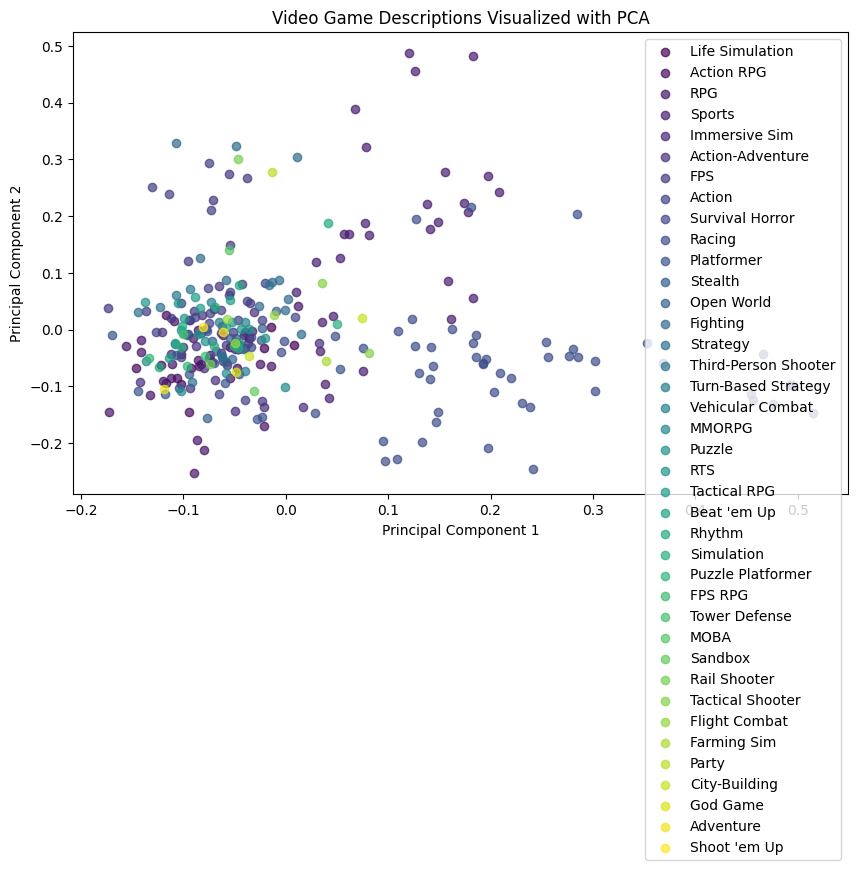

In [ ]:
# Assuming 'df' is your DataFrame containing the video game data
# (from the second coding cell)

# 1. Feature Extraction with TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['description'])

# 2. Dimensionality Reduction with PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X_tfidf.toarray())

# 3. Visualizing with Scatter Plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# Color-coding by genre (you can change this to another column)
genres = df['genre'].unique()
colors = plt.cm.get_cmap('viridis', len(genres))  # Get a colormap

for i, genre in enumerate(genres):
    indices = df[df['genre'] == genre].index
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1],
                c=[colors(i)], label=genre, alpha=0.7)  # Alpha for transparency

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Video Game Descriptions Visualized with PCA')
plt.legend(loc='best', scatterpoints=1)  # Adjust legend location as needed
plt.show()

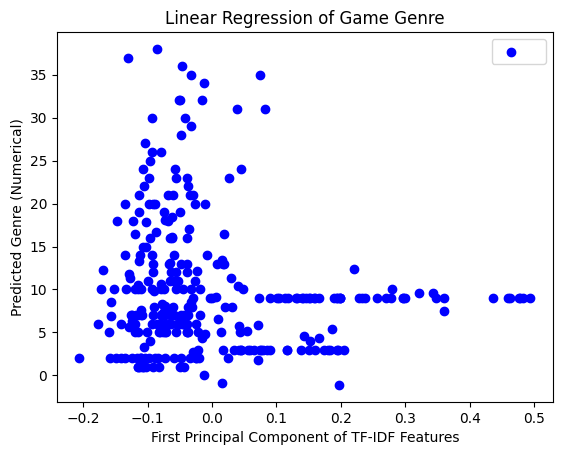

In [ ]:
# 1. Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# 2. Split data into training and testing sets
# We'll use 'description' as features and 'genre' as the target
X_train, X_test, y_train, y_test = train_test_split(
    df['description'], df['genre'], test_size=0.2, random_state=42
)

# 3. Fit and transform the data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 4. Map 'genre' to numerical values
# We need to convert genre categories to numbers for Linear Regression
# First, get unique genres and assign numerical values
unique_genres = df['genre'].unique()
genre_mapping = {genre: i for i, genre in enumerate(unique_genres)}

# Now, map the genres in the training and testing sets
y_train_numeric = y_train.map(genre_mapping)
y_test_numeric = y_test.map(genre_mapping)

# 5. Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_vec, y_train_numeric)

# 6. Predict 'genre' (as numerical values)
X_vec = vectorizer.transform(df['description'])
y_pred = model.predict(X_vec)

# 7. Visualize:
# a. Choose a numerical feature for the x-axis (using PCA)
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_vec.toarray())

# b. Plot the predicted 'genre' (numerical) against the PCA component
plt.scatter(X_pca, y_pred, color='blue', label=" ")
plt.xlabel('First Principal Component of TF-IDF Features')
plt.ylabel('Predicted Genre (Numerical)')  # Changed label
plt.title('Linear Regression of Game Genre')  # Changed title
plt.legend()
plt.show()

In [ ]:
def predict_game_genre(model, description):
    """
    Predict the genre of a video game based on its description using the trained model.
    Provides probability scores for each genre.

    :param model: The trained text classification model (pipeline).
    :param description: A string containing the video game description.
    :return: The predicted genre of the game and the probability scores.
    """
    prediction = model.predict([description])
    prediction_proba = model.predict_proba([description])

    # Getting the class labels (genres)
    class_labels = model.classes_

    # Formatting the probability scores along with the class labels as percentages
    proba_scores = {
        class_labels[i]: f"{prediction_proba[0][i]:.2%}"  # Format as percentage
        for i in range(len(class_labels))
    }

    return prediction[0], proba_scores

# Assuming 'text_clf' is your trained model (from earlier code)
# and 'df' is your DataFrame with game descriptions

# Example usage:
game_description = df['description'][0]  # Using the first game's description
predicted_genre, scores = predict_game_genre(text_clf, game_description)

print("Game Description:", game_description, "\n")
print("Predicted Genre:", predicted_genre, "\n")
print("Probability Scores:")
max_label_len = max(len(label) for label in scores)
for label, score in scores.items():
    print(f"{label:{max_label_len}}: {score:>8}")

Game Description: Create and control virtual people, managing their daily lives, relationships, and careers in a suburban sandbox. 

Predicted Genre: The Sims 

Probability Scores:
Ace Combat 04: Shattered Skies               :    0.42%
Advance Wars                                 :    0.42%
Advance Wars 2: Black Hole Rising            :    0.42%
Age of Empires II: The Conquerors            :    0.42%
Aliens vs. Predator 2                        :    0.42%
Amplitude                                    :    0.41%
Anarchy Online                               :    0.42%
Arcanum: Of Steamworks and Magick Obscura    :    0.42%
Assassin’s Creed II                          :    0.43%
Battlefield 1942                             :    0.42%
Black & White                                :    0.42%
Blinx: The Time Sweeper                      :    0.42%
Blur                                         :    0.42%
Bomberman Tournament                         :    0.41%
Borderlands                        

In [ ]:
!pip install gradio -qqq
import gradio as gr
# import joblib  # If you saved your model using joblib - not needed here

# ... (your existing code for data loading, cleaning, model training, etc.) ...
# Assuming 'text_clf' is your trained model (Pipeline) and 'df' is your DataFrame

def predict_game_genre(description):
    """
    Predicts the genre of a video game based on its description using the trained model.
    Provides probability scores for each genre.
    """
    prediction = text_clf.predict([description])
    prediction_proba = text_clf.predict_proba([description])

    # Getting the class labels (genres)
    class_labels = text_clf.classes_

    # Formatting the probability scores along with the class labels as percentages
    proba_scores = {
        class_labels[i]: f"{prediction_proba[0][i]:.2%}"
        for i in range(len(class_labels))
    }

    # Format the output for Gradio
    output = f"**Predicted Genre:** {prediction[0]}\n\n"
    for label, score in proba_scores.items():
        output += f"{label}: {score}\n"
    return output

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_game_genre,
    inputs=gr.Textbox(lines=5, placeholder="Enter video game description here..."),
    outputs="text",
    title="Video Game Genre Prediction",
    description="Enter a description of a video game, and the model will predict its genre.",
)

# Launch the interface
iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a148c9a461b8ddf992.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


### **Test Statements for Gradio**
Use the example statements below (or similar) to test the model in the Gradio interface above.


**Low Glucose:**

Recently, I’ve been feeling lightheaded, shaky, and sometimes confused, which makes me worried about my glucose level. I’ve noticed that this tends to happen [before meals, after exercise, at night, randomly], and it sometimes disrupts my daily activities. I’d like to discuss possible adjustments to my treatment or diet to help prevent these episodes.

**Normal Glucose:**

Overall, I’ve been feeling good, and my glucose levels seem to be staying within the recommended range. I haven’t noticed any major symptoms of highs or lows, but I’d like to go over my numbers with you to make sure I’m on the right track and see if there’s anything I should adjust to maintain this stability.

**High Glucose:**

Lately, I’ve been feeling very fatigued, thirsty, and experiencing frequent urination, which makes me concerned about my glucose levels. I’ve noticed that I feel weird, especially [after meals, in the morning, throughout the day], and sometimes I feel sluggish or have headaches. I’d like to discuss possible adjustments to my treatment or daily routine to help manage this better.



---



## Saving the Trained Model

This code snippet is for saving the trained machine learning model to a file so that I can reuse it later without retraining.

In [ ]:
import joblib

# Assuming 'text_clf' is your trained model (Pipeline)
# Save the model to a file named 'video_game_genre_model.joblib'
joblib.dump(text_clf, 'video_game_genre_model.joblib')

['video_game_genre_model.joblib']